In [270]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [96]:
diretorios = os.listdir('samples')
diretorios

['226md.png',
 '22d5n.png',
 '2356g.png',
 '23mdg.png',
 '23n88.png',
 '243mm.png',
 '244e2.png',
 '245y5.png',
 '24f6w.png',
 '24pew.png',
 '25257.png',
 '253dc.png',
 '25egp.png',
 '25m6p.png',
 '25p2m.png',
 '25w53.png',
 '264m5.png',
 '268g2.png',
 '28348.png',
 '28x47.png',
 '2b827.png',
 '2bg48.png',
 '2cegf.png',
 '2cg58.png',
 '2cgyx.png',
 '2en7g.png',
 '2enf4.png',
 '2fxgd.png',
 '2g783.png',
 '2g7nm.png',
 '2gyb6.png',
 '2mg87.png',
 '2mpnn.png',
 '2n73f.png',
 '2nbc5.jpg',
 '2nbcx.png',
 '2nf26.png',
 '2npg6.png',
 '2nx38.png',
 '2p2y8.png',
 '2pfpn.png',
 '2w4y7.png',
 '2wc38.png',
 '2wx73.png',
 '2x7bm.png',
 '2xc2n.png',
 '2ycn8.png',
 '2yggg.png',
 '325fb.png',
 '32cnn.png',
 '32dnn.png',
 '33b22.png',
 '33f7m.png',
 '33n73.png',
 '33ng4.png',
 '33p4e.png',
 '34b84.png',
 '34fxm.png',
 '34pcn.png',
 '368y5.png',
 '36bc2.png',
 '36nx4.png',
 '36w25.png',
 '373gb.png',
 '377xx.png',
 '378e5.png',
 '37d52.png',
 '37ep6.png',
 '387g2.png',
 '38n57.png',
 '3b4we.png',
 '3bd8

In [97]:
imagens = []
for i in diretorios:
    imagem = cv2.imread(f'samples/{i}')
    imagens.append(imagem)

In [101]:
imagens_cinza = []
for i in range(len(imagens)):
    if(imagens[i] is not None):
      imagem_cinza = cv2.cvtColor(imagens[i], cv2.COLOR_BGR2GRAY)
      imagens_cinza.append(imagem_cinza)


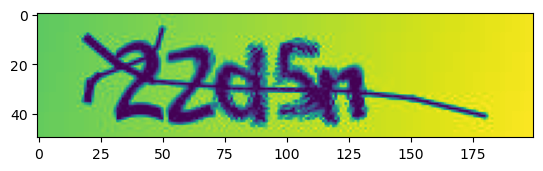

In [102]:
plt.imshow(imagens_cinza[1])

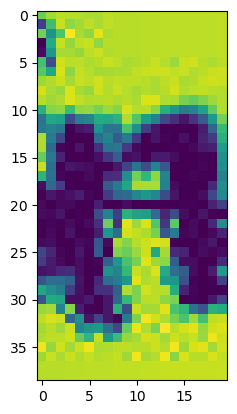

In [113]:

plt.imshow(imagens_cinza[1][11:50,112:132])

In [213]:
x_novo = np.zeros((len(imagens_cinza)*5,39,20))
y = np.zeros((len(imagens_cinza)*5))
x_novo.shape, y.shape

((5350, 39, 20), (5350,))

In [232]:
show = diretorios[1].split('.')[0]
show[0]

'2'

In [252]:

for i in range(len(imagens_cinza)):
    nome = diretorios[i].split('.')[0]

    px = 32

    for j in range(5):
        x_novo[i*5+j] = imagens_cinza[i][11:50,px:px+20]
        px +=20


        try:
            y[i*5+j] = int(nome[j])

        except:
            if(nome[j]=='a'):y[i*5+j]=10 
            elif(nome[j]=='b'):y[i*5+j]=11
            elif(nome[j]=='c'):y[i*5+j]=12
            elif(nome[j]=='d'):y[i*5+j]=13
            elif(nome[j]=='e'):y[i*5+j]=14
            elif(nome[j]=='f'):y[i*5+j]=15
            elif(nome[j]=='g'):y[i*5+j]=16
            elif(nome[j]=='h'):y[i*5+j]=17
            elif(nome[j]=='i'):y[i*5+j]=18
            elif(nome[j]=='j'):y[i*5+j]=19
            elif(nome[j]=='k'):y[i*5+j]=20
            elif(nome[j]=='l'):y[i*5+j]=21
            elif(nome[j]=='m'):y[i*5+j]=22
            elif(nome[j]=='n'):y[i*5+j]=23
            elif(nome[j]=='o'):y[i*5+j]=24
            elif(nome[j]=='p'):y[i*5+j]=25
            elif(nome[j]=='q'):y[i*5+j]=26
            elif(nome[j]=='r'):y[i*5+j]=27
            elif(nome[j]=='s'):y[i*5+j]=28
            elif(nome[j]=='t'):y[i*5+j]=29
            elif(nome[j]=='u'):y[i*5+j]=30
            elif(nome[j]=='v'):y[i*5+j]=31
            elif(nome[j]=='w'):y[i*5+j]=32
            elif(nome[j]=='x'):y[i*5+j]=33
            elif(nome[j]=='y'):y[i*5+j]=34
            elif(nome[j]=='z'):y[i*5+j]=35
    


In [264]:
x_novo.shape, y.shape

((5350, 39, 20), (5350,))

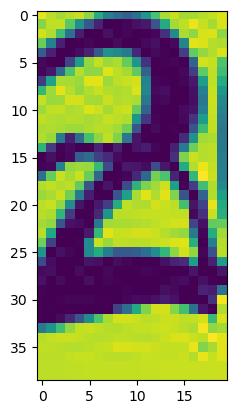

In [261]:
plt.imshow(x_novo[100])

In [265]:
y[100]

2.0

In [268]:
y_categorizado = to_categorical(y)

In [269]:
y_categorizado.shape

(5350, 35)

In [274]:
x_novo

array([[[  0.,   0.,   0., ..., 208., 205., 203.],
        [  0.,   0.,   3., ..., 207., 210., 212.],
        [ 89., 120., 126., ..., 205., 204., 203.],
        ...,
        [203., 203., 204., ..., 208., 200., 224.],
        [205., 205., 205., ..., 209., 209., 210.],
        [205., 205., 205., ..., 209., 209., 210.]],

       [[203., 204., 205., ...,  29.,   9.,   6.],
        [212., 210., 208., ..., 207., 224., 212.],
        [204., 208., 212., ..., 211., 217., 208.],
        ...,
        [220., 201., 215., ..., 211., 212., 223.],
        [210., 211., 211., ..., 216., 216., 216.],
        [210., 211., 211., ..., 216., 216., 216.]],

       [[  0.,   0.,   0., ..., 222., 227., 215.],
        [183., 182., 157., ...,  49., 100., 148.],
        [208., 213., 210., ...,   7.,   0.,   0.],
        ...,
        [217., 222., 214., ..., 220., 221., 222.],
        [216., 216., 216., ..., 221., 221., 222.],
        [216., 216., 216., ..., 221., 221., 222.]],

       ...,

       [[214., 214., 214

In [275]:
#Normalizando X
x_normalizado = x_novo/255


In [276]:
x_normalizado

array([[[0.        , 0.        , 0.        , ..., 0.81568627,
         0.80392157, 0.79607843],
        [0.        , 0.        , 0.01176471, ..., 0.81176471,
         0.82352941, 0.83137255],
        [0.34901961, 0.47058824, 0.49411765, ..., 0.80392157,
         0.8       , 0.79607843],
        ...,
        [0.79607843, 0.79607843, 0.8       , ..., 0.81568627,
         0.78431373, 0.87843137],
        [0.80392157, 0.80392157, 0.80392157, ..., 0.81960784,
         0.81960784, 0.82352941],
        [0.80392157, 0.80392157, 0.80392157, ..., 0.81960784,
         0.81960784, 0.82352941]],

       [[0.79607843, 0.8       , 0.80392157, ..., 0.11372549,
         0.03529412, 0.02352941],
        [0.83137255, 0.82352941, 0.81568627, ..., 0.81176471,
         0.87843137, 0.83137255],
        [0.8       , 0.81568627, 0.83137255, ..., 0.82745098,
         0.85098039, 0.81568627],
        ...,
        [0.8627451 , 0.78823529, 0.84313725, ..., 0.82745098,
         0.83137255, 0.8745098 ],
        [0.8